In [77]:
from langgraph.graph import StateGraph, END, START
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict, Annotated, Literal
from dotenv import load_dotenv
import os

In [78]:
load_dotenv()

True

In [79]:
model = ChatGoogleGenerativeAI(
    model = 'gemini-2.5-flash',
    google_api_key = os.getenv('GEMINI_API_KEY')
)

E0000 00:00:1759522056.867967 3533836 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


In [80]:
class Quadratic(TypedDict):

    a: int
    b: int
    c: int

    equation : str
    discriminant : float
    result : str

In [81]:
def show_equation( state : Quadratic) -> Quadratic:

    equation = f"{state['a']}x² + {state['b']}x + {state['c']}"
    return {'equation' : equation}


In [82]:
def cal_discriminant(state : Quadratic) -> Quadratic:

    discriminant = state['b']**2 - ( 4*state['a'] * state['c'] )

    return {'discriminant' : discriminant }

In [83]:
def real_roots( state: Quadratic) -> Quadratic:

    root1 = (-state['b'] + state['discriminant'] ** 0.5)/ (2* state['a'])
    root2 = (-state['b'] - state['discriminant'] ** 0.5)/ (2* state['a'])

    result = f"The two roots are {root1} & {root2}"

    return { 'result' : result}


In [84]:
def not_real_roots( state: Quadratic) -> Quadratic:

    result = f"No real roots"

    return { 'result' : result}

In [85]:
def repeated_roots( state: Quadratic) -> Quadratic:

    root = -state['b'] /(2* state['a'])

    result = f"The repeating root is {root}"

    return { 'result' : result}

In [86]:
def check_condition( state: Quadratic) -> Literal["real_roots", "repeated_roots", "not_real_roots"]:

    if state["discriminant"] > 0 :
        return 'real_roots'
    elif state["discriminant"] == 0 :
        return 'repeated_roots'
    else:
        return 'not_real_roots'

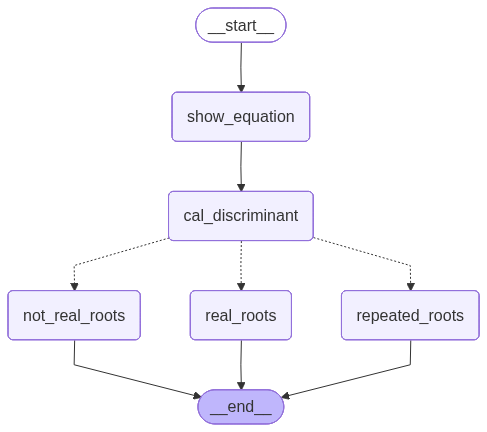

In [87]:
graph =  StateGraph(Quadratic)

graph.add_node('show_equation', show_equation)
graph.add_node('cal_discriminant', cal_discriminant)
graph.add_node('not_real_roots', not_real_roots )
graph.add_node('real_roots', real_roots )
graph.add_node('repeated_roots', repeated_roots )



graph.add_edge( START, 'show_equation')
graph.add_edge( 'show_equation', 'cal_discriminant')
graph.add_conditional_edges('cal_discriminant', check_condition)
graph.add_edge( 'real_roots', END )
graph.add_edge( 'not_real_roots', END )
graph.add_edge( 'repeated_roots', END )


workflow = graph.compile()
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())



In [88]:
initial_state = {
    'a' : 4,
    'b' : -5,
    'c' : -4
}

workflow.invoke(initial_state)



{'a': 4,
 'b': -5,
 'c': -4,
 'equation': '4x² + -5x + -4',
 'discriminant': 89,
 'result': 'The two roots are 1.8042476415070754 & -0.5542476415070754'}